In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
class LinearForm2D:
  def __init__(self, a, b, f = None, sign = None):
    # Сохраняем значения параметров, определяющих линейную форму:
    self.a = a
    self.b = b
    # Сохраняем частное значение линейной формы, если оно дано:
    self.f = f
    # Если дано неравенство, сохраняем знак
    self.sign = sign if sign in {'>=', '<=', '>', '<', '=', '=='} else None
    # Сохраняем пояснение к нашей линейной форме:
    self.label = ''
    if self.f is not None:
      self.label = str(a) + ' x_1 + ' + str(b) + ' x_2 ' + (self.sign + ' ' if self.sign is not None else ' = ') + str(f)
    else:
      self.label = 'F = ' + str(a) + ' x_1 + ' + str(b) + ' x_2'

  # Выражаем x_2 через x_1:
  def y_func(self, x):
    return (self.f - self.a * x) / self.b if self.b and self.b != 0.0 else None

  # Выражаем x_1 через x_2:
  def x_func(self, y):
    return (self.f - self.b * y) / self.a if self.a and self.a != 0.0 else None

  # Вычисляем частное значение линейной формы при заданных x_1 и x_2:
  def f_value(self, x1, x2):
    return self.a * x1 + self.b * x2

  def check_condition(self, x1, x2) -> bool:
    if self.sign == '<=':
      return self.f_value(x1, x2) <= self.f
    elif self.sign == '=' or '==':
      return self.f_value(x1, x2) == self.f
    else:
      return self.f_value(x1, x2) >= self.f

  # Подготовить график:
  def prepare_plot(self, s = 0, f = 100, num = 100, color = 'black'):
    ps = np.linspace(s, f, num)
    if (self.x_func(ps[0]) is None):
      plt.plot(ps, self.y_func(ps), label = self.label, color = color)
    else:
      plt.plot(self.x_func(ps), ps, label = self.label, color = color)
    plt.legend()
    plt.grid()


Задаем систему ограничений:

In [ ]:
b1 = LinearForm2D(2, 4, 10, '<=')
b2 = LinearForm2D(1, 0, 4, '<=')
b3 = LinearForm2D(0, 1, 2, '<=')
b4 = LinearForm2D(1, 0, 0, '>=')
b5 = LinearForm2D(0, 1, 0, '>=')

b_list = [b1, b2, b3, b4, b5]

In [ ]:
import numpy as np

from bokeh.palettes import Sunset8
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

# Call once to configure Bokeh to display plots inline in the notebook.
output_notebook()

x1, x2 = np.meshgrid(np.linspace(0, 5, 1000), np.linspace(0, 5, 1000))
f = b1.check_condition(x1, x2) & b2.check_condition(x1, x2) & \
    b3.check_condition(x1, x2)

p = figure(width=550, height=300, x_range=(0, 5), y_range=(0, 5))

levels = np.linspace(0, 1, 2)
contour = p.contour(x1, x2, f, levels, fill_color=Sunset8, line_color='black')

show(p)

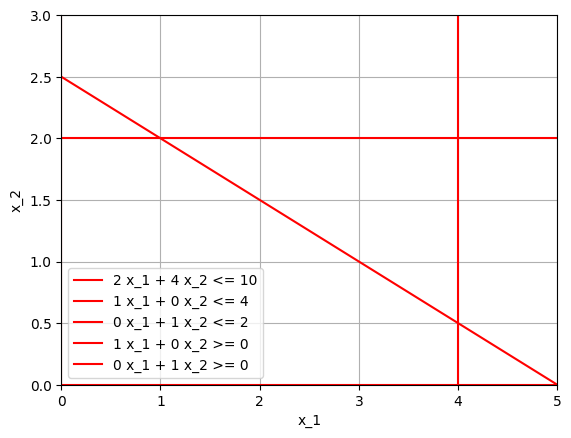

In [ ]:
for b in b_list:
  b.prepare_plot(s = 0, f = 5, color = 'red')

plt.xlabel('x_1')
plt.ylabel('x_2')

plt.xlim(0, 5)
plt.ylim(0, 3)

plt.show()

In [ ]:
def ineq(F, x, y):
  '''
  :F: линейная форма в левой части неравенства + знак неравенства + значение справа
  :x: и :y: -- конкретные значения, о которых мы хотим сказать, удовлетворяют ли они нер-ву из :F:
  '''
  if(F.sign == '<='):
    if F.y_func(x) is not None:
      return y <= F.y_func(x) if F.b > 0 else y >= F.y_func(x)
    else:
      return x <= F.x_func(y) if F.a > 0 else x >= F.x_func(y)
  elif(F.sign == '>='):
    if F.y_func(x) is not None:
      return y >= F.y_func(x) if F.b > 0 else y <= F.y_func(x)
    else:
      return x >= F.x_func(y) if F.a > 0 else x <= F.x_func(y)
  else:
    return None

In [ ]:
def ineq01(F, x, y):
  val = F.f_value(x, y)
  return val >= F.f if F.sign == '>=' else val <= F.f

In [ ]:
print(ineq(b2, 1, 1))

True


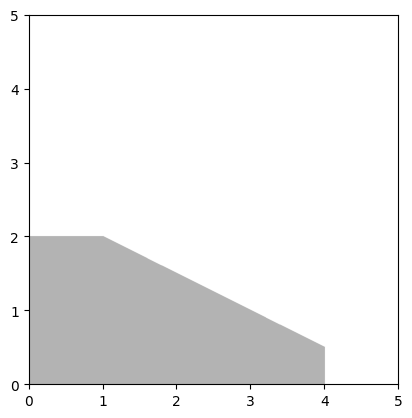

In [ ]:
ps = np.linspace(0, 5, 1000)
x, y = np.meshgrid(ps, ps)

plt.imshow(
    (ineq(b1, x, y) & ineq(b2, x, y) & ineq(b3, x, y) & ineq(b4, x, y) & ineq(b5, x, y)).astype(int),
    extent = (x.min(), x.max(), y.min(), y.max()), origin = 'lower', cmap = 'Greys', alpha = 0.3
)

plt.show()

In [ ]:
plt.fill_between(ps, b1.y_func(ps), np.minimum(b2.x_func(ps), b3.y_func(ps)), color = 'yellow')

In [ ]:
def point(f1, f2):
  d = f1.a * f2.b - f1.b * f2.a
  # print(d)
  if d == 0:
    # print('Данные прямые не пересекаются!')
    return None
  else:
    x = (f1.f * f2.b - f1.b * f2.f) / d
    y = (f1.a * f2.f - f1.f * f2.a) / d
    return (x, y)

In [ ]:
print(point(b5, b2))

-1
(4.0, -0.0)


In [ ]:
from itertools import product, combinations

a = [1, 2, 3]
b = [1, 2, 3]

print(list(combinations(a, r = 2)))

[(1, 2), (1, 3), (2, 3)]


In [ ]:
# Целевая функция:
F = LinearForm2D(3, 2)

# Списки значений целевой функции и точек, в которых они достигаются:
F_list = []
pt_list = []

# Условие на то, что очередная точка является допустимым решением:
pt_is_feasible = lambda x, y: ineq(b1, x, y) & ineq(b2, x, y) & ineq(b3, x, y) & ineq(b4, x, y) & ineq(b5, x, y)

for p in list(combinations(b_list, r = 2)):
  pt = point(p[0], p[1])
  if pt is not None and pt_is_feasible(pt[0], pt[1]):
    pt_list.append(pt)
    F_list.append(F.f_value(pt[0], pt[1]))

# Поиск оптимального решения:
F_max = max(F_list) # Можно поменять на min
print(F_list, F_max)
print(pt_list[F_list.index(F_max)])
print(pt_list)

[13.0, 7.0, 12.0, 4.0, 0.0] 13.0
(4.0, 0.5)
[(4.0, 0.5), (1.0, 2.0), (4.0, 0.0), (-0.0, 2.0), (0.0, 0.0)]
